<a href="https://colab.research.google.com/github/marinados03/mvp_pos_pucrio/blob/main/mvp_Analise_e_melhores_praticas_Marina_Duarte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **MVP Análise de Dados e Boas Práticas**

**Nome:** Marina Duarte

**Matrícula:** 4052024001648

**Dataset:** https://www.kaggle.com/datasets/mahdimashayekhi/social-media-vs-productivity



# **Avaliação do impacto de diferentes hábitos na produtividade**



## **Introdução e Definição do Problema**

#### **Contexto e Motivação**

Nos dias atuais vemos um aumento expressivo do uso de mídias sociais. Ao mesmo tempo, temos uma sociedade com uma frequência cada vez maior de problemas psicológicos. Esses dois itens muitas vezes são vistos como correlacionados, porém isso é apenas uma hipótese.

O burnout,  também conhecido como síndrome do esgotamento profissional, é um distúrbio emocional caracterizado por exaustão extrema, estresse e esgotamento físico e mental, resultante de situações de trabalho desgastantes, com muita pressão e competitividade.

Nos últimos anos, percebe-se um aumento significativo nos casos de burnout, tanto em termos de diagnósticos quanto de afastamentos do trabalho por essa condição. Tendo, inclusive, sido reconhecido pela Organização Mundial da Saúde (OMS) como um fenômeno ocupacional, com um código específico na Classificação Internacional de Doenças (CID).

Doenças psicológicas assim como o bournout podem afetar de forma direta a produtividade das pessoas.

Este trabalho tem por objetivo avaliar um grupo de usuários e seus comportamentos relacionados às mídias sociais para entender o impacto desses em sua produtividade.


#### **Descrição do problema**

Esse dataset será usado para um problema de **regressão supervisionada**, uma vez que temos um conjunto de features de comportamento e objetiva-se obter o valor de score de produtividade real para aquele usuário.

O **score de produtividade real é um valor numérico e contínuo** que pode variar de 0 a 10 neste dataset.

#### **Premissas**

- Qualidade e integridade dos dados - o dataset selecionado contém variáveis relevantes e os dados são consistentes
- Variáveis explicativas e alvo estão disponíveis nesse dataset
- Ausência ou tratamento de dados faltantes - dados ausentes serão identificados e tratados
- Independência das observações - as amostras são consideradas independentes
- Amostragem significativa - considera-se que a amostragem presente no dataset representa a realidade


#### **Hipóteses a serem avaliadas**

1. Entender se o comportamento de uma dada pessoa em mídias sociais impacta a sua produtividade
2. Entender se as caracteríticas individuais, assim como, comportamentos e sensações de uma dada pessoa impactam a sua produtividadade
3. Entender se o time de trabalho e comportamento nesse impacta a produtividade de uma dada pessoa
4. Entender se o score de produtividade percebido é realmente associado ao score de produtividade real.
5. Entender se a idade de um usuário muda seu comportamento em relação à mídias sociais.


## **Dataset Utilizado**

#### **Seleção de dados**

O dataset utilizado está disponível gratuitamente no site kagle. Apresenta uma boa quantidade de dados relacionados ao problema em questão e, além disso, a critério de aprendizagem, também possui valores nulos para tratamento.

#### **Atributos do Dataset**

`age` - Idade do usuário

`gender` - Identidade de genero do usuário

`job_type` - Setor ou Status do trabalho do usuário

`daily_social_media_time` - Tempo médio diário gasto em mídias sociais (em horas)

`social_platform_preference` - Plataforma de mídia social mais utilizada pelo usuário

`number_of_notifications` - Número diário de notificações recebidas

`work_hours_per_day` - Média de horas trabalhadas por dia

`perceived_productivity_score` - Score de produtividade auto-avaliado pelo usuário (escala 0 a 10)

`actual_productivity_score` - Score de produtividade real do usuário (escala: 0 a 10)

`stress_level` - Nível de stress atual do usuário (escala: 0 a 10)

`sleep_hours` - Tempo médio de horas dormidas por noite

`screen_time_before_sleep` - Tempo médio de tela antes de dormir (em horas)

`breaks_during_work` - Número de intervalos realizados durante o período de trabalho

`uses_focus_apps` - Se um usuário usa ou não aplicativos de foco (True/False)

`has_digital_wellbeing_enabled` - Se um usuário usa ou não serviços de controle de bem estar (True/ False)

`coffee_consumption_per_day` - Número de xícaras de café consumidas por dia

`days_feeling_burnout_per_month` - Número de dias nos quais foi reportado sensação de burnout em um mês

`weekly_offline_hours` - Total de horas gastas em situações offline (excluindo sono)

`job_satisfaction_score` - Score de satisfação em relação a trabalho / vida pessoal (escala: 0 a 10)


## **Importação das bibliotecas a serem utilizadas**

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

#Imports principais para manipulação e visualização
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings

#Imports para execução de separação de treino e teste e transformação de dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Imports para feature section
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_regression # para o teste ANOVA da Seleção Univariada considerando regressão


## **Importação do dataset**

In [2]:
#Importação do dataset salvo salvo em csv no github
df = pd.read_csv("https://raw.githubusercontent.com/marinados03/mvp_pos_pucrio/refs/heads/main/social_media_vs_productivity.csv")

df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


As colunas serão ordenadas de modo que `actual_productivity_score` (target) esteja na última posição:

In [3]:
colunas = [col for col in df.columns if col != 'perceived_productivity_score'] + ['perceived_productivity_score']
df = df[colunas]

In [4]:
colunas = [col for col in df.columns if col != 'actual_productivity_score'] + ['actual_productivity_score']
df = df[colunas]

In [5]:
df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score,perceived_productivity_score,actual_productivity_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688,8.040464,7.291555
1,46,Male,Health,3.249603,Twitter,59,9.169296,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427,5.063368,5.165093
2,32,Male,Finance,NaN,Twitter,57,7.910952,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944,3.861762,3.474053
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670,2.916331,1.774869
4,25,Male,IT,NaN,Telegram,66,6.214096,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060,8.868753,NaN


## **Análise exploratória de dados**

In [6]:
#entendendo tamanho do dataset
df.shape

(30000, 19)

O dataset possui 30.000 instâncias com 19 colunas, sendo a última `actual_productivity_score` o alvo do trabalho

In [7]:
#entendendo se existem valores nulos
df.isnull().sum()

,0
age,0
gender,0
job_type,0
daily_social_media_time,2765
social_platform_preference,0
number_of_notifications,0
work_hours_per_day,0
stress_level,1904
sleep_hours,2598
screen_time_before_sleep,2211


O dataset possui registros nulos nas colunas:

`daily_social_media_time` (9,2%)

`stress_level` (6,3%)

`sleep_hours` (8,7%)

`screen_time_before_sleep` (7,4%)

`job_satisfaction_score` (9,1%)

`perceived_productivity_score` (5,4%)

`actual_productivity_score` (7,9%)

Vale ressaltar que a coluna target, nesse momento, também possui valores nulos.

In [8]:
#Entendo tipo de dados e quantidade de non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   stress_level                    28096 non-null  float64
 8   sleep_hours                     27402 non-null  float64
 9   screen_time_before_sleep        27789 non-null  float64
 10  breaks_during_work              30000 non-null  int64  
 11  uses_focus_apps                 30000 non-null  bool   
 12  has_digital_wellbeing_enabled   

O dataset apresenta 14 atributos numéricos (int64, float64), 3 atributos categóricos (object) e 2 atributos booleanos (bool).


### **Entendendo melhor a variável target**

In [9]:
#estatísticas descritivas da variável target
df['actual_productivity_score'].describe()

,actual_productivity_score
count,27635.000000
mean,4.951805
std,1.883378
min,0.296812
25%,3.373284
50%,4.951742
75%,6.526342
max,9.846258


Text(0, 0.5, 'Frequência')

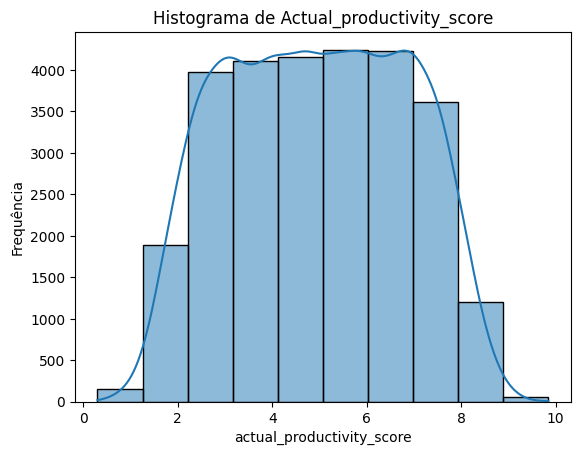

In [10]:
#Criando histograma de distribuição da variável target
sns.histplot(data=df['actual_productivity_score'], bins=10, kde=True, palette="viridis")
plt.title('Histograma de Actual_productivity_score')
plt.xlabel('actual_productivity_score')
plt.ylabel('Frequência')

A variável target posssui 27.635 instâncias com média de 4,95 e desvio de 1,88. Os valores se distribuem de acordo com o histograma acima, com valor mínimo em 0,30 e máximo em 9,85, com maior concentração entre os valores 3 e 7.

### **Entendendo melhor as variáveis do tipo qualitativa**

Agora, entederemos as categorias presentes nos atributos do tipo object:



In [11]:
df['gender'].describe()

,gender
count,30000
unique,3
top,Male
freq,14452


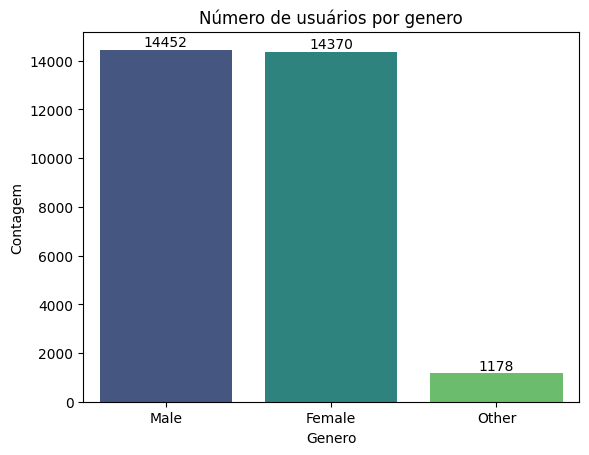

In [12]:
#Criando gráfico de barras entre diferentes classes da feature 'Genero'
ax = sns.countplot(x='gender', data=df, palette="viridis")

for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{int(altura)}',
                (p.get_x() + p.get_width() / 2., altura),
                ha='center', va='bottom',
                fontsize=10)

plt.title('Número de usuários por genero')
plt.xlabel('Genero')
plt.ylabel('Contagem')
plt.show()

A variável `genêro` possui 30.000 instâncias com 3 categorias, sendo a maior parte distribuída entre os genêros Masculino e Feminino. Existem 1.178 instâncias referentes ao genêros outros.

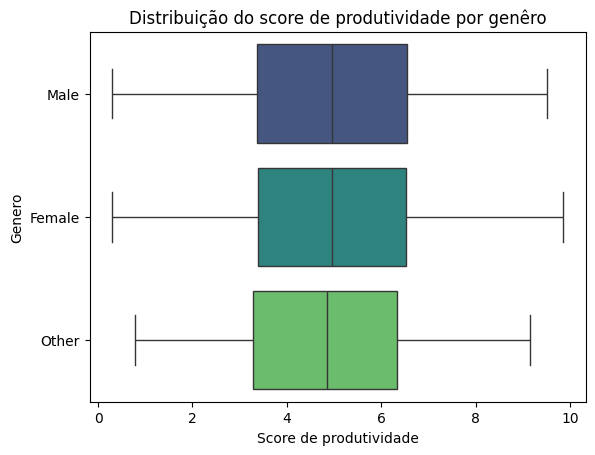

In [13]:
#Criando boxplot para entender distribuição do score de produtividade entre diferentes generos
sns.boxplot(x='actual_productivity_score', y='gender', data=df, palette="viridis")

plt.title('Distribuição do score de produtividade por genêro')
plt.xlabel('Score de produtividade')
plt.ylabel('Genero')
plt.show()

A distribuição é muito próxima entre generos, sendo levemente mais concentrada no genero 'outros' e mais esparça no genero 'feminino'. A mediana é muito próxima entre generos e também, próxima à maior concentração da variável target que observamos no histograma da seção anterior.


In [14]:
df['job_type'].describe()

,job_type
count,30000
unique,6
top,Education
freq,5055


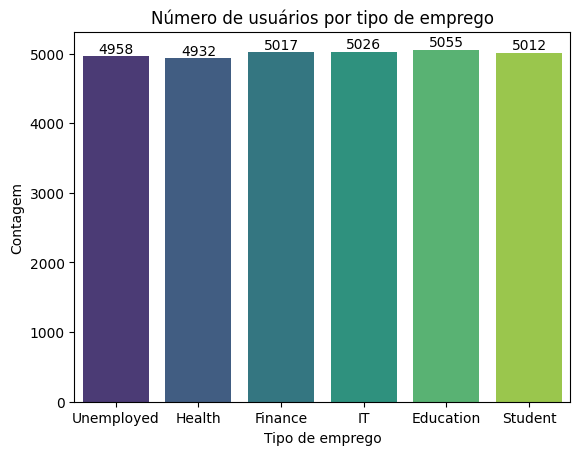

In [15]:
#Criando gráfico de barras entre diferentes classes da feature 'Job_type'
ax = sns.countplot(x='job_type', data=df, palette="viridis")

for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{int(altura)}',
                (p.get_x() + p.get_width() / 2., altura),
                ha='center', va='bottom',
                fontsize=10)

plt.title('Número de usuários por tipo de emprego')
plt.xlabel('Tipo de emprego')
plt.ylabel('Contagem')
plt.show()

A variável `job_type` possui 30.000 instâncias com 6 categorias, as instâncias são bem distribuídas nas diferentes classes, sendo o tipo de trabalho em 'Educação' o mais presente com 5.055 instâncias.



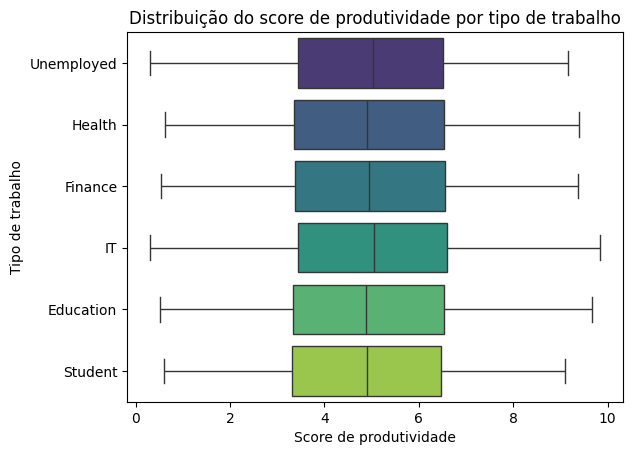

In [16]:
#Criando boxplot para entender distribuição do score de produtividade entre diferentes tipos de trabalho
sns.boxplot(x='actual_productivity_score', y='job_type', data=df, palette="viridis")

plt.title('Distribuição do score de produtividade por tipo de trabalho')
plt.xlabel('Score de produtividade')
plt.ylabel('Tipo de trabalho')
plt.show()

A distribuição do score de produtividade também é muito próxima entre tipos de trabalho.


In [17]:
df['social_platform_preference'].describe()

,social_platform_preference
count,30000
unique,5
top,TikTok
freq,6096


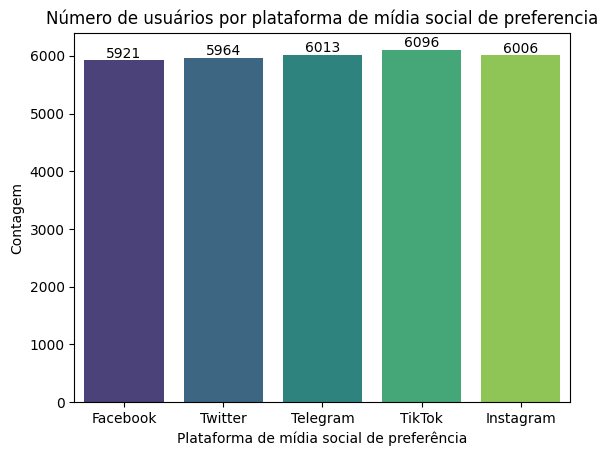

In [18]:
#Criando gráfico de barras entre diferentes classes da feature 'Midia social de preferencia'
ax = sns.countplot(x='social_platform_preference', data=df, palette="viridis")

for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{int(altura)}',
                (p.get_x() + p.get_width() / 2., altura),
                ha='center', va='bottom',
                fontsize=10)

plt.title('Número de usuários por plataforma de mídia social de preferencia')
plt.xlabel('Plataforma de mídia social de preferência')
plt.ylabel('Contagem')
plt.show()

A variável `social_platform_preference` possui 30.000 instâncias com 5 categorias, as instâncias são bem distribuídas nas diferentes classes, sendo a mídia tiktok a mais presente com 6.096 instâncias.

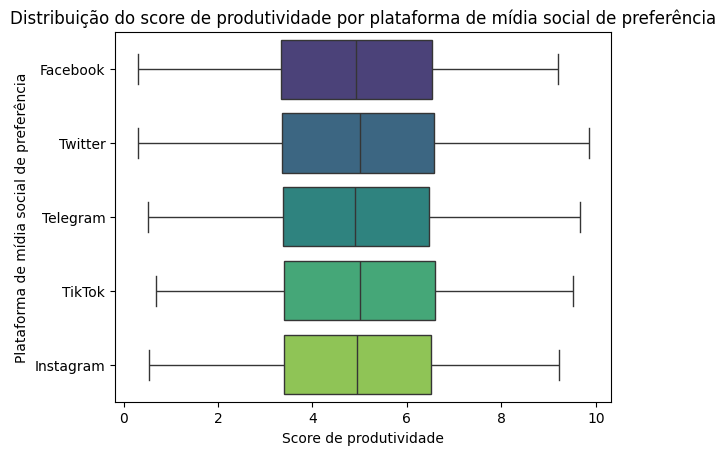

In [19]:
#Criando boxplot para entender distribuição do score de produtividade entre diferentes midias sociais de preferencia
sns.boxplot(x='actual_productivity_score', y='social_platform_preference', data=df, palette="viridis")

plt.title('Distribuição do score de produtividade por plataforma de mídia social de preferência')
plt.xlabel('Score de produtividade')
plt.ylabel('Plataforma de mídia social de preferência')
plt.show()

A distribuição do score de produtividade também é muito próxima entre as mídias sociais de preferência.

Como uma das hipóteses a serem testadas é se existe correlação entre a idade e o tipo de mídia social preferida, faremos um outro boxplot para associar essas variáveis:


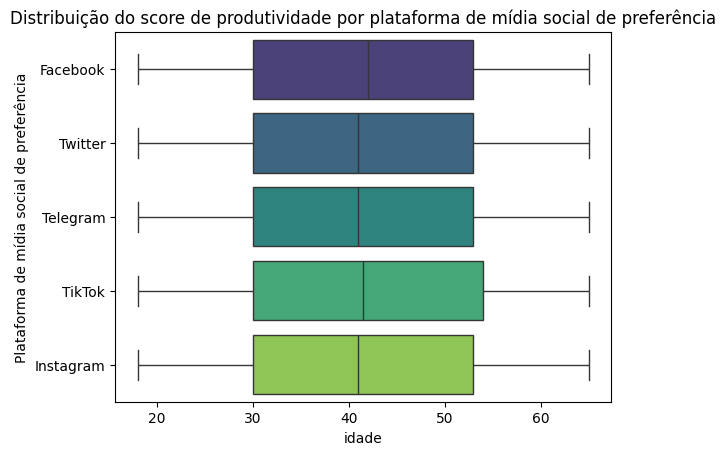

In [20]:
#Criando boxplot para entender distribuição de idade entre diferentes midias sociais de preferencia
sns.boxplot(x='age', y='social_platform_preference', data=df, palette="viridis")

plt.title('Distribuição do score de produtividade por plataforma de mídia social de preferência')
plt.xlabel('idade')
plt.ylabel('Plataforma de mídia social de preferência')
plt.show()

Na amostragem estudada, não observa-se grande diferença na distribuição de idade entre as diferentes mídias sociais de preferência. A mediana de idade é apenas levemente superior na mídia 'Facebook' e 'tiktok'.

Agora, entederemos as categorias presentes nos atributos do tipo bool:


In [21]:
df['uses_focus_apps'].describe()

,uses_focus_apps
count,30000
unique,2
top,False
freq,20979


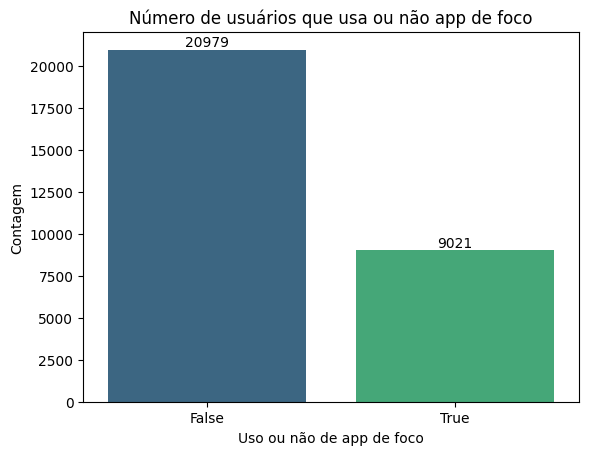

In [22]:
#Criando gráfico de barras entre diferentes classes da feature 'Uso de aplicativo de foco'
ax = sns.countplot(x='uses_focus_apps', data=df, palette="viridis")

for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{int(altura)}',
                (p.get_x() + p.get_width() / 2., altura),
                ha='center', va='bottom',
                fontsize=10)

plt.title('Número de usuários que usa ou não app de foco')
plt.xlabel('Uso ou não de app de foco')
plt.ylabel('Contagem')
plt.show()

A variável `uses_focus_apps` possui 30.000 instâncias booleanas. A maior parte dos usuários (69,9%) não usa aplicativo de foco em seu dia a dia.

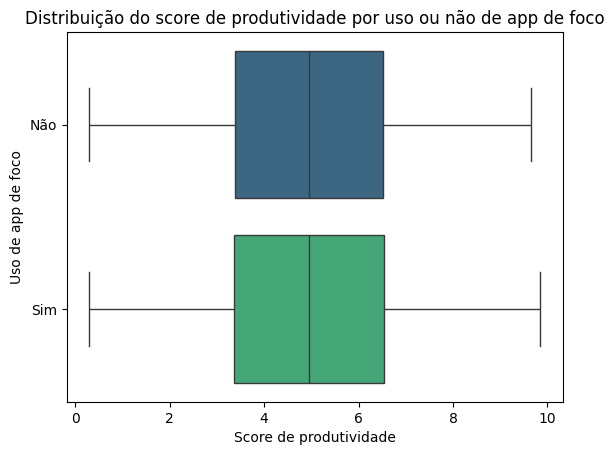

In [23]:
#Transformando variável para visualização no boxplot
df['uses_focus_apps_leg'] = df['uses_focus_apps'].map({True: 'Sim', False: 'Não'})

#Criando boxplot para entender distribuição de score de produtividade entre uso ou não de aplicativo de foco
sns.boxplot(x='actual_productivity_score', y='uses_focus_apps_leg', data=df, palette="viridis")
plt.title('Distribuição do score de produtividade por uso ou não de app de foco')
plt.xlabel('Score de produtividade')
plt.ylabel('Uso de app de foco')
plt.show()

A distribuição do score de produtividade também é muito próxima entre usuários que usa ou não app de foco.

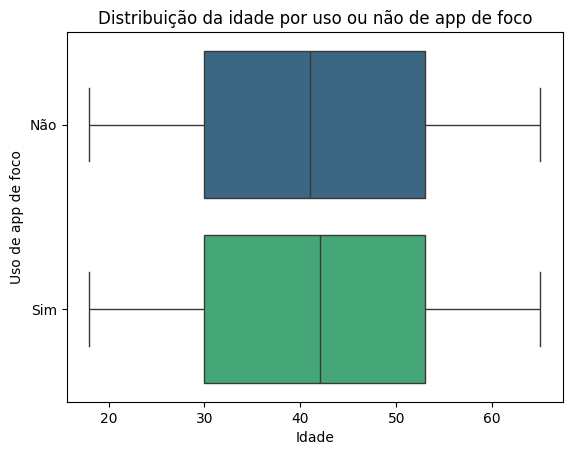

In [24]:
#Criando boxplot para entender distribuição da idade entre uso ou não de aplicativo de foco
sns.boxplot(x='age', y='uses_focus_apps_leg', data=df, palette="viridis")
plt.title('Distribuição da idade por uso ou não de app de foco')
plt.xlabel('Idade')
plt.ylabel('Uso de app de foco')
plt.show()

Embora seja observada uma mediana de idade levemente mais alta para pessoas que usam app de foco, a distribuição é muito parecida nos dois grupos.

In [25]:
df['has_digital_wellbeing_enabled'].describe()

,has_digital_wellbeing_enabled
count,30000
unique,2
top,False
freq,22602


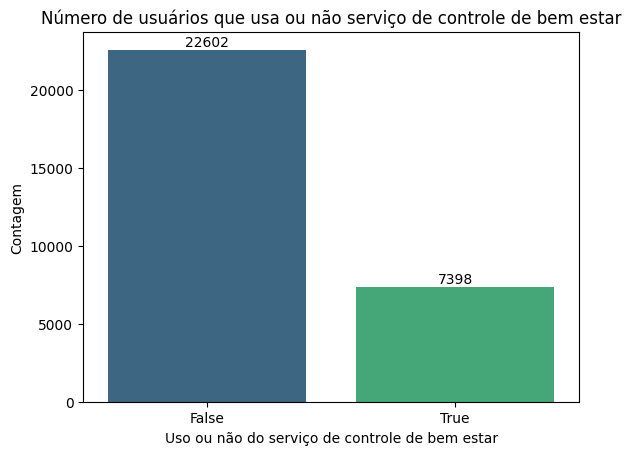

In [26]:
#Criando gráfico de barras entre diferentes classes da feature 'Uso de serviço de controle de bem estar'
ax = sns.countplot(x='has_digital_wellbeing_enabled', data=df, palette="viridis")

for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{int(altura)}',
                (p.get_x() + p.get_width() / 2., altura),
                ha='center', va='bottom',
                fontsize=10)

plt.title('Número de usuários que usa ou não serviço de controle de bem estar')
plt.xlabel('Uso ou não do serviço de controle de bem estar')
plt.ylabel('Contagem')
plt.show()

A variável `has_digital_wellbeing_enabled` possui 30.000 instâncias booleanas. A maior parte dos usuários (75,34%) não usa o serviço de controle de bem estar em seu dia a dia.

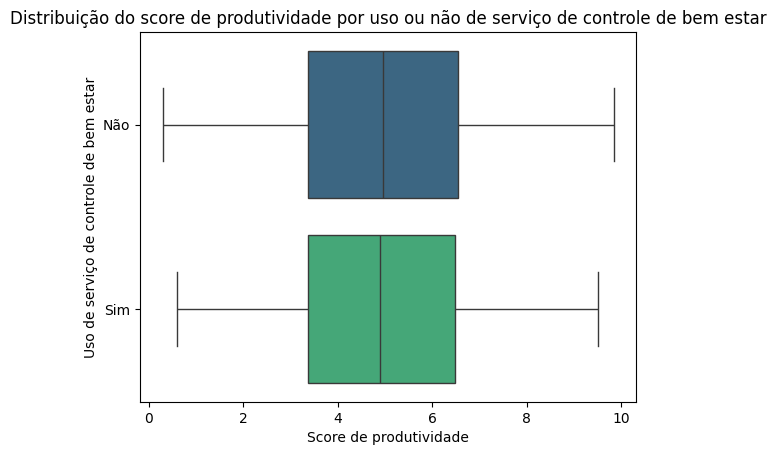

In [27]:
#Transformando variável para visualização no boxplot
df['has_digital_wellbeing_enabled_leg'] = df['has_digital_wellbeing_enabled'].map({True: 'Sim', False: 'Não'})

#Criando boxplot para entender distribuição do score de produtividade entre uso ou não serviço de controle de bem estar
sns.boxplot(x='actual_productivity_score', y='has_digital_wellbeing_enabled_leg', data=df, palette="viridis")
plt.title('Distribuição do score de produtividade por uso ou não de serviço de controle de bem estar')
plt.xlabel('Score de produtividade')
plt.ylabel('Uso de serviço de controle de bem estar')
plt.show()

A distribuição do score de produtividade também é muito próxima entre usuários que usa ou não serviço de controle de bem estar.

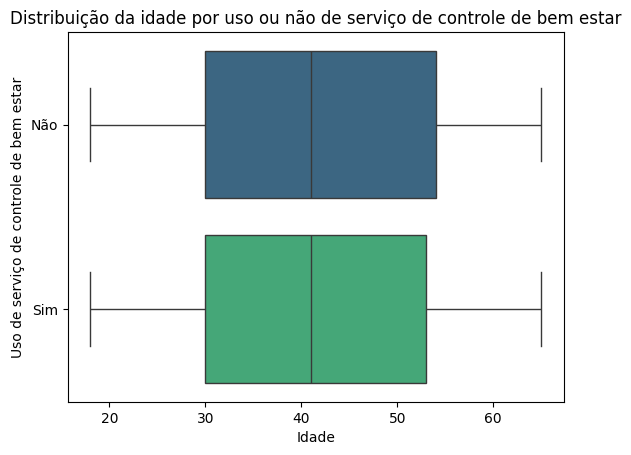

In [28]:
#Criando boxplot para entender distribuição da idade entre uso ou não de serviço de controle de bem estar
sns.boxplot(x='age', y='has_digital_wellbeing_enabled_leg', data=df, palette="viridis")
plt.title('Distribuição da idade por uso ou não de serviço de controle de bem estar')
plt.xlabel('Idade')
plt.ylabel('Uso de serviço de controle de bem estar')
plt.show()

Distrbuição de idades nos grupos que usam ou não o serviço de controle de bem estar é muito próxima.

### **Entendendo melhor as variáveis quantitativas**

Para iniciar a exploração quantitativa, será criado um dataframe que contém apenas essas variáveis:

In [29]:
#Criando DataFrame somente com variáveis quantitativas
df_quanti = df[['age','daily_social_media_time','number_of_notifications','work_hours_per_day','stress_level','sleep_hours','screen_time_before_sleep',
                'breaks_during_work','coffee_consumption_per_day','days_feeling_burnout_per_month','weekly_offline_hours','job_satisfaction_score',
                'perceived_productivity_score','actual_productivity_score']]

In [30]:
df_quanti.head()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score,perceived_productivity_score,actual_productivity_score
0,56,4.180940,61,6.753558,4.0,5.116546,0.419102,8,4,11,21.927072,6.336688,8.040464,7.291555
1,46,3.249603,59,9.169296,7.0,5.103897,0.671519,7,2,25,0.000000,3.412427,5.063368,5.165093
2,32,NaN,57,7.910952,4.0,8.583222,0.624378,0,3,17,10.322044,2.474944,3.861762,3.474053
3,60,NaN,59,6.355027,6.0,6.052984,1.204540,1,0,4,23.876616,1.733670,2.916331,1.774869
4,25,NaN,66,6.214096,7.0,5.405706,1.876254,1,1,30,10.653519,9.693060,8.868753,NaN


In [31]:
#Entendendo tamanho do novo dataset
df_quanti.shape

(30000, 14)

O dataset com features apenas quantitativas tem 30.000 instâncias e apenas 14 colunas.

In [32]:
#criando estatísticas descritivas do dataset quantitativo
df_quanti.describe()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score,perceived_productivity_score,actual_productivity_score
count,30000.000000,27235.000000,30000.000000,30000.000000,28096.000000,27402.000000,27789.000000,30000.000000,30000.000000,30000.000000,30000.000000,27270.000000,28386.000000,27635.000000
mean,41.486867,3.113418,59.958767,6.990792,5.514059,6.500247,1.025568,4.992200,1.999300,15.557067,10.360655,4.964901,5.510488,4.951805
std,13.835221,2.074813,7.723772,1.997736,2.866344,1.464004,0.653355,3.173737,1.410047,9.252956,7.280415,2.121194,2.023470,1.883378
min,18.000000,0.000000,30.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000252,0.296812
25%,30.000000,1.639566,55.000000,5.643771,3.000000,5.493536,0.528490,2.000000,1.000000,8.000000,4.541872,3.363580,3.757861,3.373284
50%,41.000000,3.025913,60.000000,6.990641,6.000000,6.498340,1.006159,5.000000,2.000000,16.000000,10.013677,4.951049,5.525005,4.951742
75%,53.000000,4.368917,65.000000,8.354725,8.000000,7.504143,1.477221,8.000000,3.000000,24.000000,15.300809,6.581323,7.265776,6.526342
max,65.000000,17.973256,90.000000,12.000000,10.000000,10.000000,3.000000,10.000000,10.000000,31.000000,40.964769,10.000000,8.999376,9.846258


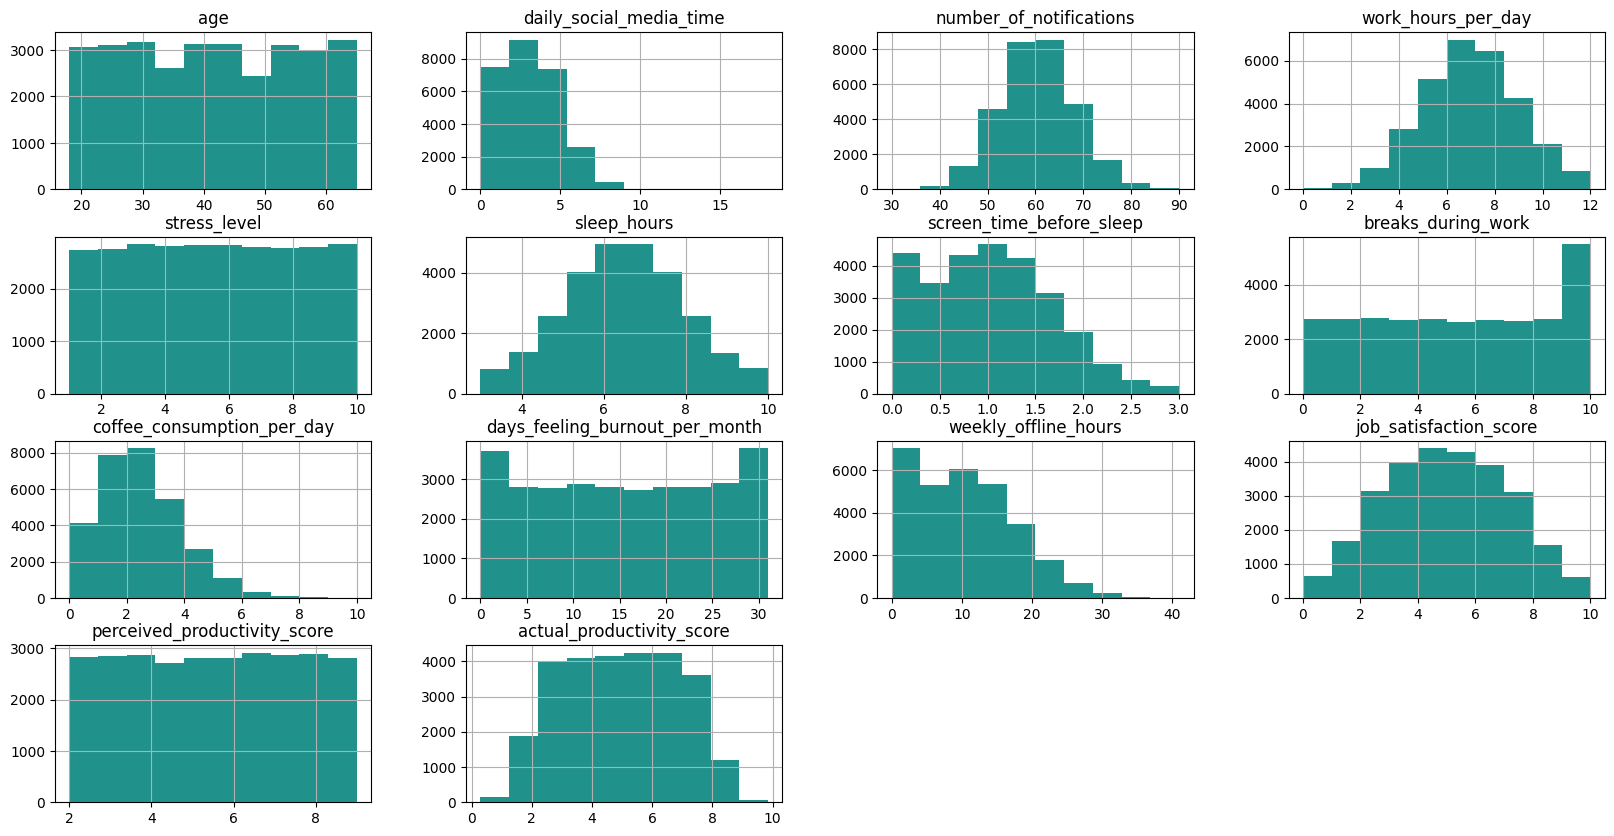

In [33]:
#Criando histogramas de cada uma das variáveis quantitativas
df_quanti.hist(figsize = (20,10), color=cm.viridis(0.5))
plt.show()

Sobre as variáveis numéricas, ao avaliar estatísticas descritivas e histogramas, percebe-se:

`age` - 30.000 instâncias, variando de  18 a 65, com média em 41,5 e desvio padrão em 13,8. A distribuição é próxima de uniforme.

`daily_social_media_time` - 27.235 instâncias, variando de 0 a 18,0, com média em 3,1 e desvio em 2,1. A distribuição é mais concentrada na esquerda(em valores menores), com uma cauda alongada na direção dos valores mais alto.

`number_of_notifications` - 30.000 instâncias, variando de 30 a 90, com média em 60,0 e desvio padrão em 7,7. A distribuição se aproxima de uma distribuição normal.

`work_hours_per_day` - 30.000 instâncias, variando de 0 a 12, com média em  7,0 e desvio padrão em 2,0. A distribuição também se aproxima de uma distribuição normal.

`stress_level` - 28.096 instâncias, variando de 1 a 10, com média em  5,5 e desvio padrão em 2,9. A distribuição é próxima de uniforme.

`sleep_hours` - 27.402 instâncias, variando de 3 a 10, com média em  6,5 e desvio padrão em 1,5. A distribuição é próxima de uma distribuição normal.

`screen_time_before_sleep` - 27.789 instâncias, variando de 0 a 3, com média em  1,0 e desvio padrão em 0,7. A distribuição é mais concentrada em valores mais baixos com uma calda longa em valores mais altos.

`breaks_during_work` - 30.000 instâncias, variando de 0 a 10, com média em  5,0 e desvio padrão em 3,2. A distribuição é próximo de uniforme porém possui um pico no valor máximo.

`coffee_consumption_per_day` - 30.000 instâncias, variando de 0 a 10, com média em  2,0 e desvio padrão em 1,4. A distribuição é próxima de uma distribuição normal porém levemente mais alongada em valores mais altos.

`days_feeling_burnout_per_month` - 30.000 instâncias, variando de 0 a 31, com média em  15,6 e desvio padrão em 9,2. A distribuição é parcialmente uniforme apresentando picos nos valores mínimos e máximos.

`weekly_offline_hours` - 30.000 instâncias, variando de 0 a 41, com média em 10,4 e desvio padrão em 7,3. A distribuição é mais concentrada em valores mais baixos com uma calda longa em valores mais altos.

`job_satisfaction_score` - 27.270 instâncias, variando de 0 a 10, com média em  5,0 e desvio padrão em 2,1. A distribuição é próxima de uma distribuição normal.

`perceived_productivity_score` - 28.386 instâncias, variando de  2 a 9, com média em 5,5 e desvio padrão em 2,0. A distribuição é próxima de uniforme.


<Axes: >

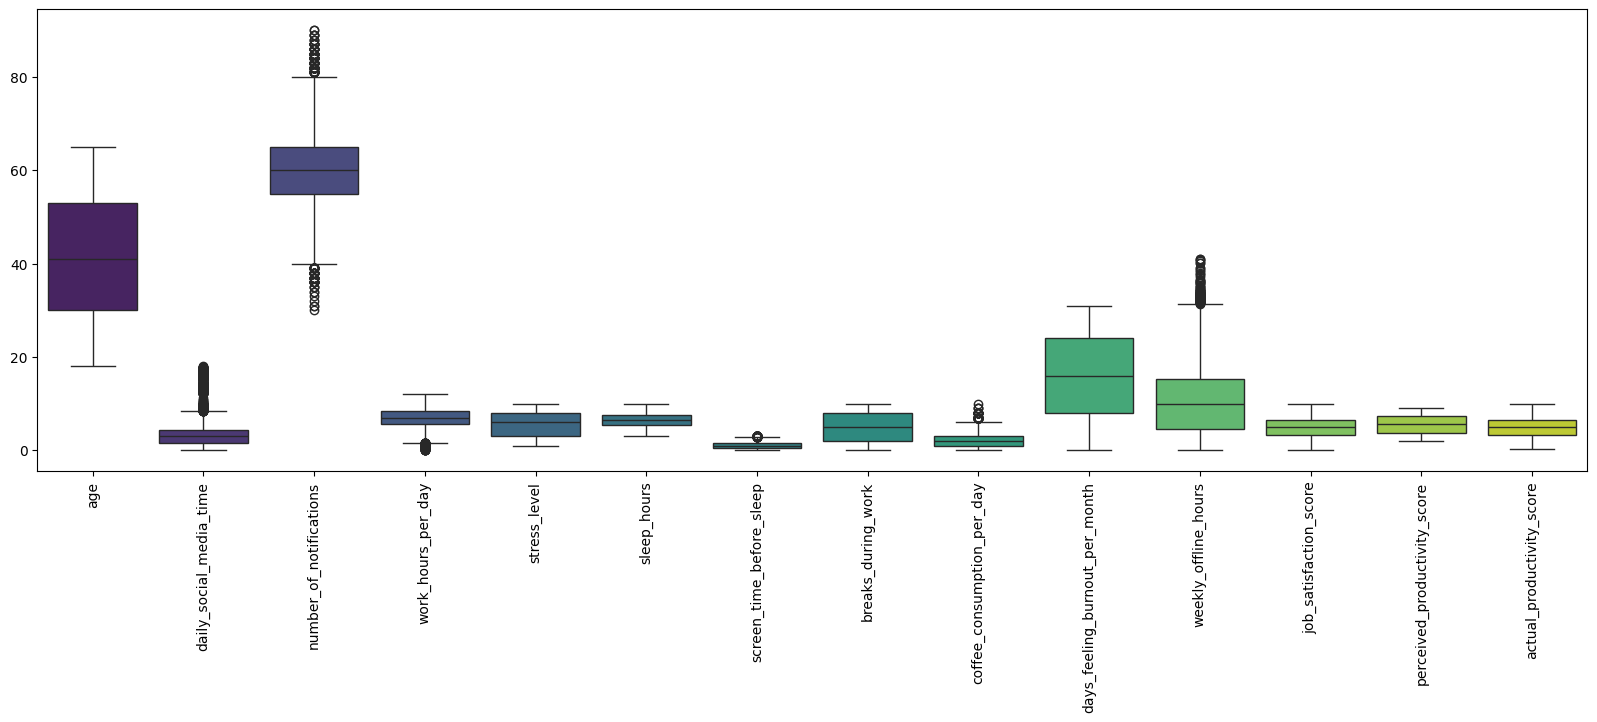

In [34]:
#Criando boxplots de cada uma das variáveis quantitativas
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
sns.boxplot(data = df_quanti, palette="viridis")

Observa-se uma distruição em valores mais altos para `age`, `number_of_notifications`, `days_feeling_burnout_per_month` e `weekly_offline_hours`, **indicando que será necessário um tratamento no pré-processamento**, uma vez que o problema de **regressão é muito sensível à escala.**

Observa-se também que a variável `work_hours_per_day` apresentam outliers inferiores. Enquanto que `daily_social_media_time`, `screen_time_before_sleep`, `coffee_consumption_per_day`, `weekly_offline_hours` apresentam outliers superiores. Já a variável `number_of_notifications` apresenta outliers inferiores e superiores.


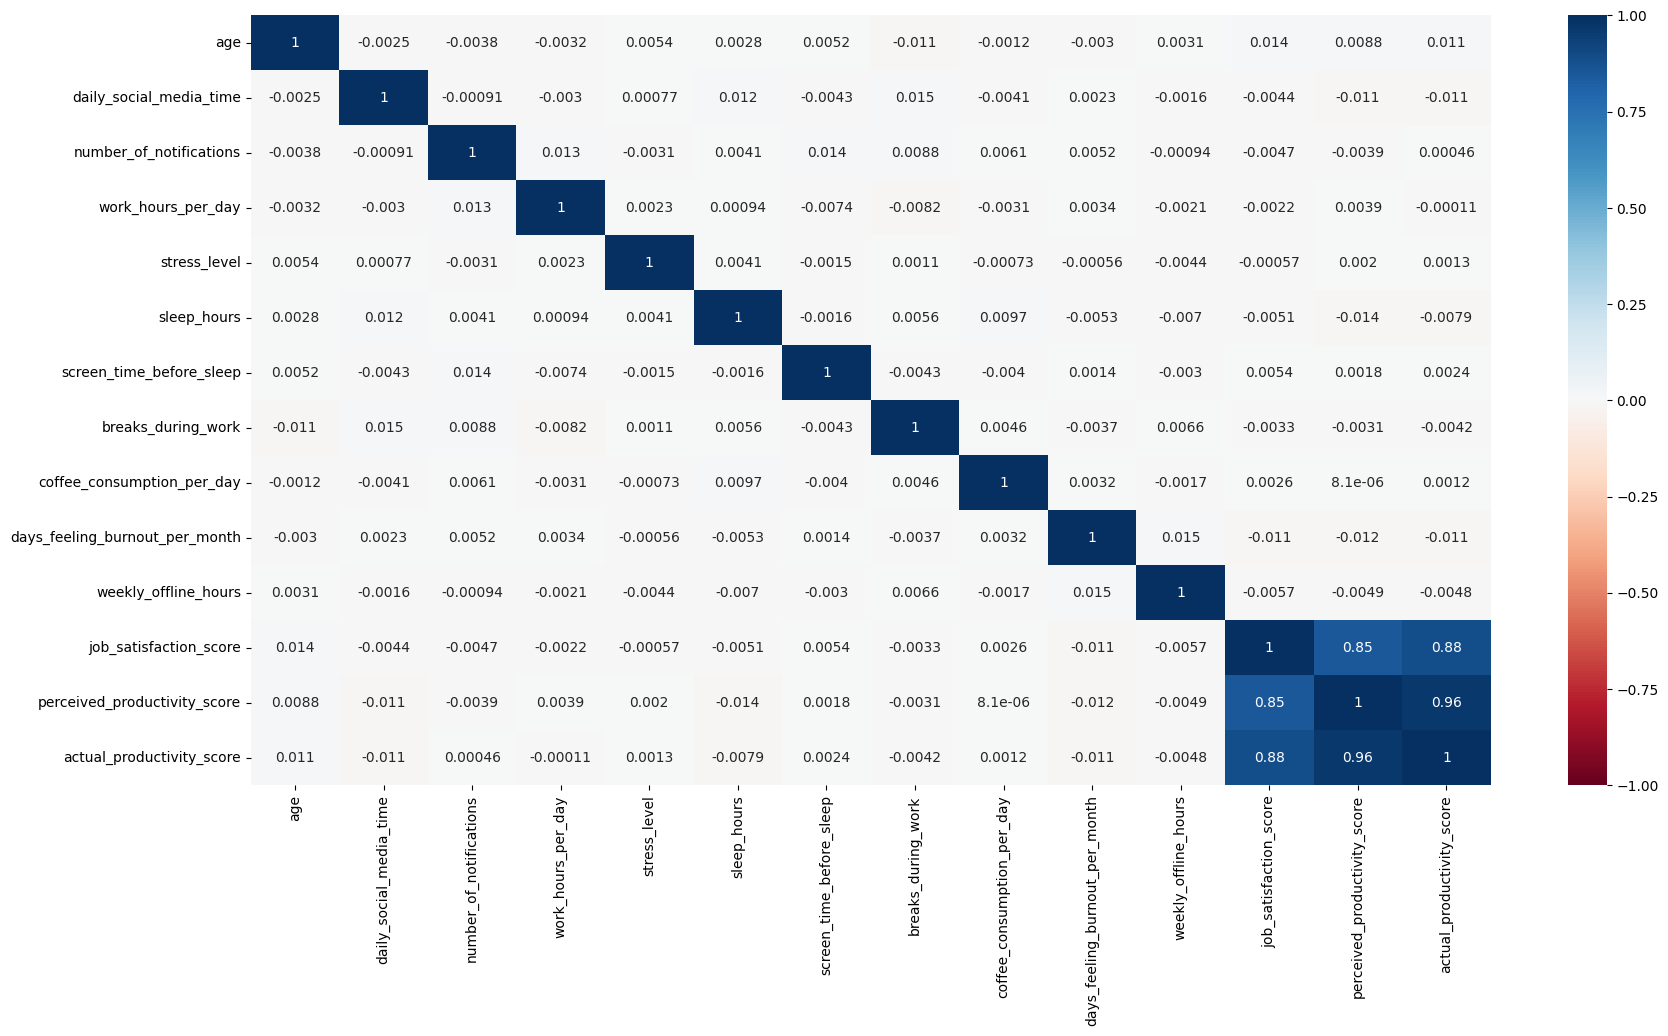

In [35]:
#Criando mapa de correlação entre as variáveis quantitativas
plt.figure(figsize = (20,10))
sns.heatmap(df_quanti.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Observa-se que a maioria das variáveis existentes não apresentam correlação entre si, tampouco com a variável target.

Entretanto, 2 variáveis apresentam grande correlação direta entre si e com a target, são elas: `job_satisfaction_score` e `perceived_productivity_score`.

**Ou seja, quanto maior a satisfação com o trabalho, maior a percepção de produtividade e maior o score real de produtividade.**

O score percebido apresenta uma correlação de 0,96 com o real, indicando que as pessoas tem uma boa percepção de produtividade.

## **Pré-processamento de dados**

Agora, serão realizados diferentes processos de limpeza e pré processamento de dados para deixar a base pronta para o treinamento de um modelo de regressão.

### **Limpeza - tratamento de Missing Values**

Para início, voltamos com o dataframe anterior, retirando as colunas de mapeamento que foram feitas com as variáveis booleanas para observação das distribuições em boxplot.

In [36]:
df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,stress_level,sleep_hours,screen_time_before_sleep,...,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score,perceived_productivity_score,actual_productivity_score,uses_focus_apps_leg,has_digital_wellbeing_enabled_leg
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,4.0,5.116546,0.419102,...,False,False,4,11,21.927072,6.336688,8.040464,7.291555,Não,Não
1,46,Male,Health,3.249603,Twitter,59,9.169296,7.0,5.103897,0.671519,...,True,True,2,25,0.000000,3.412427,5.063368,5.165093,Sim,Sim
2,32,Male,Finance,NaN,Twitter,57,7.910952,4.0,8.583222,0.624378,...,True,False,3,17,10.322044,2.474944,3.861762,3.474053,Sim,Não
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,6.0,6.052984,1.204540,...,False,False,0,4,23.876616,1.733670,2.916331,1.774869,Não,Não
4,25,Male,IT,NaN,Telegram,66,6.214096,7.0,5.405706,1.876254,...,False,True,1,30,10.653519,9.693060,8.868753,NaN,Não,Sim


In [37]:
#Descartando colunas criadas para observação em boxplot das variáveis booleanas
df = df.drop(['uses_focus_apps_leg', 'has_digital_wellbeing_enabled_leg'], axis=1)

In [38]:
#Checando colunas descartadas
df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score,perceived_productivity_score,actual_productivity_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688,8.040464,7.291555
1,46,Male,Health,3.249603,Twitter,59,9.169296,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427,5.063368,5.165093
2,32,Male,Finance,NaN,Twitter,57,7.910952,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944,3.861762,3.474053
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670,2.916331,1.774869
4,25,Male,IT,NaN,Telegram,66,6.214096,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060,8.868753,NaN


Relembrando o que foi visto anteriormente:

In [39]:
#Revisando existência de valores nulos
df.isnull().sum()

,0
age,0
gender,0
job_type,0
daily_social_media_time,2765
social_platform_preference,0
number_of_notifications,0
work_hours_per_day,0
stress_level,1904
sleep_hours,2598
screen_time_before_sleep,2211


Para evitar inputs de tratamento na variável target, como perderemos apenas 2365 instâncias, o que corresponde a 7,9% dessas, será realizado o descarte dessas linhas, de modo a trabalhar **apenas com as instâncias que possuem valor para a variável target `actual_productivity_score`**

In [40]:
#criação de dataset excluindo instância com valores nulos na variável target
df_clean = df.dropna(subset=['actual_productivity_score'])

In [41]:
#entendendo tamanho do novo dataset
df_clean.shape

(27635, 19)

Agora, ficamos com 27.635 instâncias e 19 variáveis.

In [42]:
#Verificando novamente a existênica de valores nulos
df_clean.isnull().sum()

,0
age,0
gender,0
job_type,0
daily_social_media_time,2540
social_platform_preference,0
number_of_notifications,0
work_hours_per_day,0
stress_level,1755
sleep_hours,2418
screen_time_before_sleep,2042


Como foi observada grande correlação entre as colunas `job_satisfaction_score` e `perceived_productivity_score` com a variável target, e ainda existem valores nulos nessas, também será optado por descartar essas instâncias.

In [43]:
#Descartando instâncias que apresentam valores nulos nas colunas que apresentaram alta correlação com a variável target
df_clean = df_clean.dropna(subset=['job_satisfaction_score','perceived_productivity_score'])

In [44]:
#entendendo tamanho do novo dataset
df_clean.shape

(23795, 19)

Agora, temos um dataset com 23.795 e 19 variáveis

In [45]:
#Verificando nulos novamente
df_clean.isnull().sum()

,0
age,0
gender,0
job_type,0
daily_social_media_time,2214
social_platform_preference,0
number_of_notifications,0
work_hours_per_day,0
stress_level,1523
sleep_hours,2093
screen_time_before_sleep,1752


Como as demais features não apresentam grande correlação com a variável target, será feito o tratamento com preenchimento dos valores nulos com a mediana desses. De modo a utilizar essas instâncias para o treinamento do modelo a posteriori.

In [46]:
#Tratamento de dados com preenchimento de valores nulos pela mediana
df_clean['daily_social_media_time'] = df_clean['daily_social_media_time'].fillna(df['daily_social_media_time'].median())
df_clean['stress_level'] = df_clean['stress_level'].fillna(df['stress_level'].median())
df_clean['sleep_hours'] = df_clean['sleep_hours'].fillna(df['sleep_hours'].median())
df_clean['screen_time_before_sleep'] = df_clean['screen_time_before_sleep'].fillna(df['screen_time_before_sleep'].median())

In [47]:
#entendendo tamanho do novo dataset
df_clean.shape

(23795, 19)

Conforme esperado, não mudamos o tamanho do dataset, vimos que não exluímos instâncias.

In [48]:
#Verificação de nulos
df_clean.isnull().sum()

,0
age,0
gender,0
job_type,0
daily_social_media_time,0
social_platform_preference,0
number_of_notifications,0
work_hours_per_day,0
stress_level,0
sleep_hours,0
screen_time_before_sleep,0


Finalmente, temos um **dataset sem valores nulos presentes**.

### **Transformação de variáveis categóricas:**





Para dar prosseguimento ao pré processamento de dados para criação de um dataset para um modelo de regressão, é necessário tranformar as variáveis categóricas em numéricas.

Para tanto, será utilizado a técnica de **one hot encoding**. Nesta, cada categoria única de uma variável categórica vira uma nova coluna binária (0 ou 1).
Se a observação pertence àquela categoria, o valor da coluna é 1; caso contrário, é 0.

In [49]:
#Ativar encoder para colunas categóricas em questão
encoder = OneHotEncoder(sparse_output=False, drop='first')
col_cat = df_clean[['gender', 'job_type', 'social_platform_preference']]

col_encoded = encoder.fit_transform(col_cat)
nomes_colunas = encoder.get_feature_names_out(['gender', 'job_type', 'social_platform_preference'])

# Converter para DataFrame
df_encoded = pd.DataFrame(col_encoded, columns=nomes_colunas, index=df_clean.index)

In [50]:
df_encoded.head()

,gender_Male,gender_Other,job_type_Finance,job_type_Health,job_type_IT,job_type_Student,job_type_Unemployed,social_platform_preference_Instagram,social_platform_preference_Telegram,social_platform_preference_TikTok,social_platform_preference_Twitter
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### **Transformação de variáveis booleanas:**


Assim como acontece com as variávels categóricas, as booleanas precisam ser transformadas. Entretanto, como tem apenas valores True e False, esses podem ser transformados em 1 e 0, respectivamente

In [51]:
#Transformando variáveis booleanas em 0 ou 1
df_clean['uses_focus_apps'] = df_clean['uses_focus_apps'].astype(int)
df_clean['has_digital_wellbeing_enabled'] = df['has_digital_wellbeing_enabled'].astype(int)

In [52]:
df_clean[['uses_focus_apps', 'has_digital_wellbeing_enabled']].head()

,uses_focus_apps,has_digital_wellbeing_enabled
0,0,0
1,1,1
2,1,0
3,0,0
6,0,0


### **Criando dataset totalmente numérico:**

In [53]:
#Selecinando dataset numerico
col_num = df_clean.drop(columns=col_cat)

#Concatenando dataset numero com o que que passou pelas transformações categóricas--> numéricas.
df_clean_encoded = pd.concat([df_encoded, col_num], axis=1)

In [54]:
df_clean_encoded.head()

,gender_Male,gender_Other,job_type_Finance,job_type_Health,job_type_IT,job_type_Student,job_type_Unemployed,social_platform_preference_Instagram,social_platform_preference_Telegram,social_platform_preference_TikTok,...,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score,perceived_productivity_score,actual_productivity_score
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.419102,8,0,0,4,11,21.927072,6.336688,8.040464,7.291555
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.671519,7,1,1,2,25,0.000000,3.412427,5.063368,5.165093
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.624378,0,1,0,3,17,10.322044,2.474944,3.861762,3.474053
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.204540,1,0,0,0,4,23.876616,1.733670,2.916331,1.774869
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,2.252624,4,0,0,4,20,24.084905,5.501373,6.420989,5.976408


In [55]:
#Entendendo tamanho do dataset
df_clean_encoded.shape

(23795, 27)

Agora temos uma quantidade maior de features, uma vez que as variáveis categórias foram transformadas em mais de uma coluna.

In [56]:
#Verificando nulos
df_clean_encoded.isnull().sum()

,0
gender_Male,0
gender_Other,0
job_type_Finance,0
job_type_Health,0
job_type_IT,0
job_type_Student,0
job_type_Unemployed,0
social_platform_preference_Instagram,0
social_platform_preference_Telegram,0
social_platform_preference_TikTok,0


### **Separação em base de treino e teste:**

Para treinamento de um modelo supervisionado, é necessário divisão do dataset em treino e teste para que o modelo possa ser treinamento em um grupo e testado no outro, de modo a **não haver vazamento de dados**.

Essa etapa precisa ser feita antes da padronização, uma vez que, caso seja feita depois, pode gerar vazamento de dados, uma vez que utilizaria para cálculo os dados existentes em treino e teste.

In [57]:
# Separação em bases de treino e teste
array = df_clean_encoded.values
X = pd.DataFrame(array[:,:-1], columns=df_clean_encoded.columns[:-1]) # atributos (desconsiderando o consumer_id que é um index)
y = pd.DataFrame(array[:,-1], columns=df_clean_encoded.columns[-1:]) # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão deixando 20% da base para teste

print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (19036, 26)
Dimensões de X_test: (4759, 26)
Dimensões de y_train: (19036, 1)
Dimensões de y_test: (4759, 1)


### **Padronização:**

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. **É muito útil para o caso de modelo de regressão que é sensível à escala dos dados**. Como havia sido citado anteriormente.

In [58]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [59]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

In [60]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [61]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
   gender_Male  gender_Other  job_type_Finance  job_type_Health  job_type_IT  \
0    -0.968351     -0.199409          2.232972         -0.44521    -0.446903   
1     1.032683     -0.199409         -0.447834         -0.44521     2.237620   
2    -0.968351     -0.199409          2.232972         -0.44521    -0.446903   
3    -0.968351     -0.199409         -0.447834         -0.44521     2.237620   
4     1.032683     -0.199409         -0.447834         -0.44521    -0.446903   

   job_type_Student  job_type_Unemployed  \
0         -0.449101            -0.445465   
1         -0.449101            -0.445465   
2         -0.449101            -0.445465   
3         -0.449101            -0.445465   
4         -0.449101            -0.445465   

   social_platform_preference_Instagram  social_platform_preference_Telegram  \
0                              2.005004                            -0.498177   
1                              2.005004  

<Axes: >

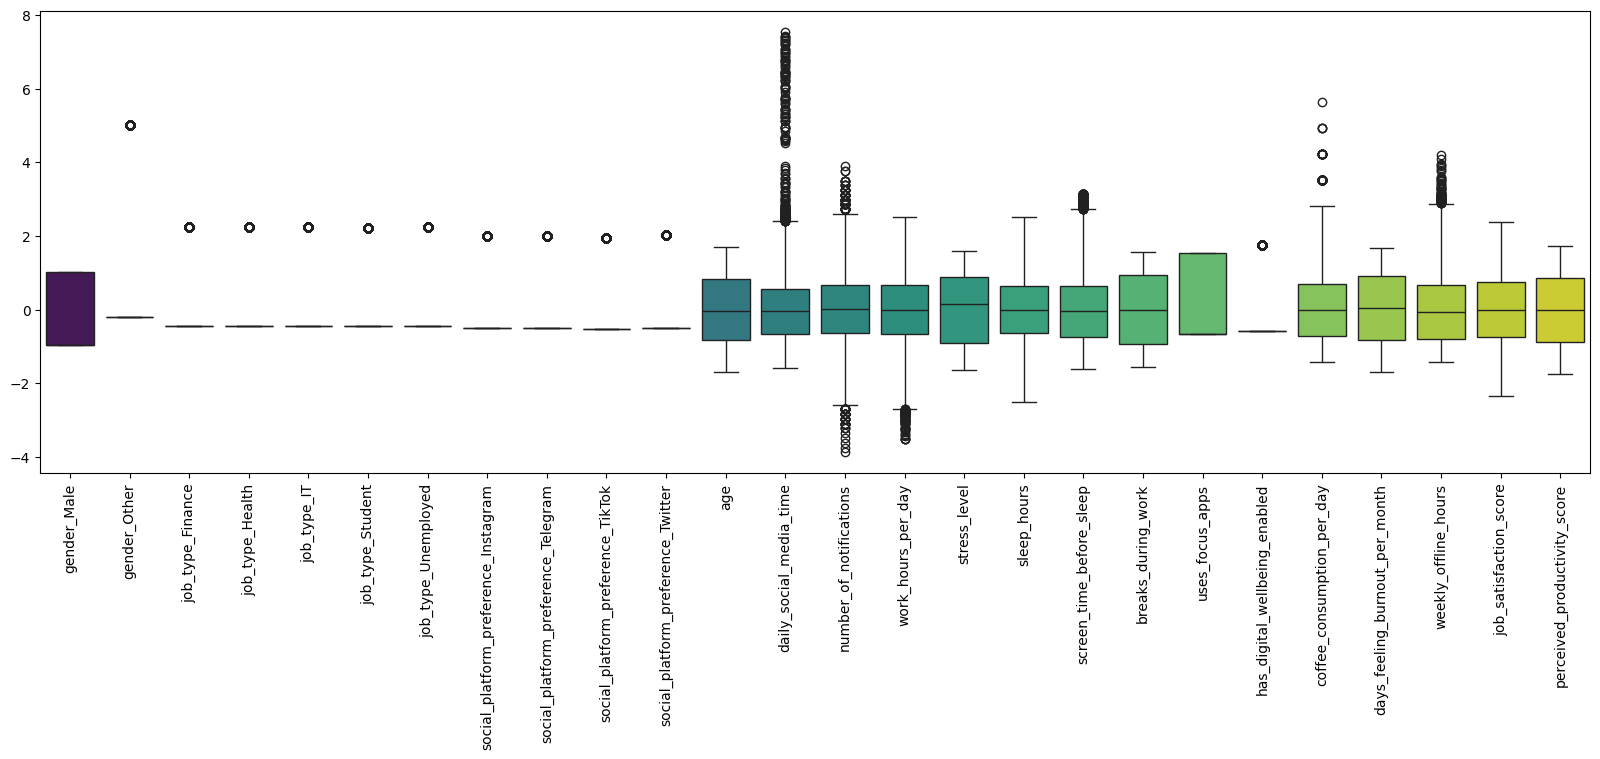

In [62]:
#Criano boxplot com variáveis padronizadas
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
sns.boxplot(data = df_standardized, palette="viridis")

Conforme esperado, distribuições estão centradas no 0.

In [63]:
df_standardized.describe()

,gender_Male,gender_Other,job_type_Finance,job_type_Health,job_type_IT,job_type_Student,job_type_Unemployed,social_platform_preference_Instagram,social_platform_preference_Telegram,social_platform_preference_TikTok,...,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score,perceived_productivity_score
count,1.903600e+04,1.903600e+04,1.903600e+04,1.903600e+04,1.903600e+04,1.903600e+04,1.903600e+04,1.903600e+04,1.903600e+04,1.903600e+04,...,1.903600e+04,1.903600e+04,1.903600e+04,1.903600e+04,1.903600e+04,1.903600e+04,1.903600e+04,1.903600e+04,1.903600e+04,1.903600e+04
mean,-5.039045e-17,-4.777762e-17,-8.211778e-18,-1.866313e-17,5.972202e-18,-9.182261e-17,2.724817e-17,-5.673592e-17,3.135406e-17,2.202249e-17,...,3.796081e-16,1.351211e-16,2.687491e-17,-8.099799e-17,-2.164923e-17,1.157114e-16,-2.155592e-17,-7.269290e-17,-3.088748e-16,-3.356564e-16
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,...,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-9.683510e-01,-1.994092e-01,-4.478337e-01,-4.452105e-01,-4.469035e-01,-4.491011e-01,-4.454646e-01,-4.987521e-01,-4.981771e-01,-5.117771e-01,...,-2.515167e+00,-1.615575e+00,-1.568073e+00,-6.501696e-01,-5.706371e-01,-1.415650e+00,-1.687797e+00,-1.419822e+00,-2.334860e+00,-1.731854e+00
25%,-9.683510e-01,-1.994092e-01,-4.478337e-01,-4.452105e-01,-4.469035e-01,-4.491011e-01,-4.454646e-01,-4.987521e-01,-4.981771e-01,-5.117771e-01,...,-6.423007e-01,-7.275614e-01,-9.398205e-01,-6.501696e-01,-5.706371e-01,-7.094390e-01,-8.211350e-01,-7.928300e-01,-7.529241e-01,-8.630420e-01
50%,-9.683510e-01,-1.994092e-01,-4.478337e-01,-4.452105e-01,-4.469035e-01,-4.491011e-01,-4.454646e-01,-4.987521e-01,-4.981771e-01,-5.117771e-01,...,-3.817851e-03,-2.215878e-02,2.557761e-03,-6.501696e-01,-5.706371e-01,-3.227589e-03,4.552755e-02,-5.028445e-02,-9.736124e-03,5.085994e-03
75%,1.032683e+00,-1.994092e-01,-4.478337e-01,-4.452105e-01,-4.469035e-01,-4.491011e-01,-4.454646e-01,-4.987521e-01,-4.981771e-01,-5.117771e-01,...,6.428672e-01,6.541473e-01,9.449361e-01,1.538060e+00,-5.706371e-01,7.029838e-01,9.121901e-01,6.782459e-01,7.616981e-01,8.685994e-01
max,1.032683e+00,5.014813e+00,2.232972e+00,2.246129e+00,2.237620e+00,2.226670e+00,2.244847e+00,2.005004e+00,2.007318e+00,1.953976e+00,...,2.509915e+00,3.135414e+00,1.573188e+00,1.538060e+00,1.752427e+00,5.646464e+00,1.670520e+00,4.203419e+00,2.376189e+00,1.727829e+00


A padronização é confirmada através das estatísticas descritivas acima. Todas as médias aproximadamente 0,0 e os desvios aproximadamente 1,0.

### **Utilização método de seleção de features:**

É sabido que o **excesso de features para treinamento de um modelo pode ser um problema**, causando dificuldades no aprendizado de padrões e piorando o tempo de processamento.

Como não observamos grandes correlações diretas ao avaliar as diferentes features presentes no dataset, é interessante realizar o processo

In [64]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_regression, k='all')

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

In [65]:
#Criando tabela de scores
tabela_scores = pd.DataFrame({
    'feature': X.columns,
    'score': fit.scores_,
    'p_value': fit.pvalues_
})

In [66]:
tabela_scores.sort_values(by='score', ascending=False)

,feature,score,p_value
25,perceived_productivity_score,3.163634e+05,0.000000
24,job_satisfaction_score,8.408334e+04,0.000000
11,age,4.981100e+00,0.025635
12,daily_social_media_time,4.734400e+00,0.029575
4,job_type_IT,4.207931e+00,0.040246
22,days_feeling_burnout_per_month,2.915975e+00,0.087719
1,gender_Other,2.468029e+00,0.116197
5,job_type_Student,2.456175e+00,0.117077
20,has_digital_wellbeing_enabled,2.311616e+00,0.128424
18,breaks_during_work,1.787268e+00,0.181272


Conforme esperado, as duas variáveis de maior correlação apresentam score significativamente mais altos que os demais:

`perceived_productivity_score` - score=3.163634e+05; p-value=0,0

`job_satisfaction_score` - score=8.408334e+04; p-value=0,0


Entretando, será deixado para uso do modelo todas as variáveis com p-value <= 0,05, ou seja, também serão incluídas as variáveis `age`, `daily_social_media_time` e `job_type_IT`, mesmo com score mais baixos que as duas primeiras.

In [67]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_regression, k=5) #5 foi o número de variáveis com p-value inferior à 0,05.

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", df_standardized.columns[:26])

# Exibe as pontuações de cada atributos e os 5 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=2) # 2 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=df_standardized.columns[:26]))


Número original de atributos: 26

Número reduzido de atributos: 5

Atributos Originais: Index(['gender_Male', 'gender_Other', 'job_type_Finance', 'job_type_Health',
       'job_type_IT', 'job_type_Student', 'job_type_Unemployed',
       'social_platform_preference_Instagram',
       'social_platform_preference_Telegram',
       'social_platform_preference_TikTok',
       'social_platform_preference_Twitter', 'age', 'daily_social_media_time',
       'number_of_notifications', 'work_hours_per_day', 'stress_level',
       'sleep_hours', 'screen_time_before_sleep', 'breaks_during_work',
       'uses_focus_apps', 'has_digital_wellbeing_enabled',
       'coffee_consumption_per_day', 'days_feeling_burnout_per_month',
       'weekly_offline_hours', 'job_satisfaction_score',
       'perceived_productivity_score'],
      dtype='object')

Scores dos Atributos Originais: [1.10e-03 2.47e+00 2.89e-10 1.55e+00 4.21e+00 2.46e+00 5.87e-01 5.77e-02
 3.70e-01 6.75e-01 6.00e-01 4.98e+00 4.73e+00 1.41e-01

In [68]:
X_train_final = df_standardized[['job_type_IT', 'age', 'daily_social_media_time', 'job_satisfaction_score','perceived_productivity_score']]

In [69]:
X_train_final.head()

,job_type_IT,age,daily_social_media_time,job_satisfaction_score,perceived_productivity_score
0,-0.446903,-0.830117,1.774870,-1.712911,-1.704978
1,2.237620,0.038441,-0.041782,0.403003,0.632830
2,-0.446903,-0.902497,-0.041782,0.439481,0.085579
3,2.237620,-1.047257,-0.272841,0.254753,1.418070
4,-0.446903,0.689859,0.333414,-0.195642,-0.416745


In [70]:
X_train_final.describe()

,job_type_IT,age,daily_social_media_time,job_satisfaction_score,perceived_productivity_score
count,1.903600e+04,1.903600e+04,1.903600e+04,1.903600e+04,1.903600e+04
mean,5.972202e-18,1.225235e-16,-5.421640e-17,-3.088748e-16,-3.356564e-16
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-4.469035e-01,-1.698675e+00,-1.574376e+00,-2.334860e+00,-1.731854e+00
25%,-4.469035e-01,-8.301171e-01,-6.658805e-01,-7.529241e-01,-8.630420e-01
50%,-4.469035e-01,-3.393898e-02,-4.178229e-02,-9.736124e-03,5.085994e-03
75%,-4.469035e-01,8.346190e-01,5.626981e-01,7.616981e-01,8.685994e-01
max,2.237620e+00,1.703177e+00,7.528894e+00,2.376189e+00,1.727829e+00


## **Conclusão**

Nesse notebook foi realizado uma análise exploratória de dados e pré processamento desses considerando a utilização para o treinamento de um modelo supervisionado de regressão onde objetiva-se definir o valor de score real de produtividade para um novo usuário baseado em suas características e no comportamento desse em relação à mídias sociais e trabalho.

Para tanto, realizou-se etapas de pré processamento como:
- transformação categórica
- tranformação booleana
- padronização
- seleção de categorias

Resumidamente, notou-se que poucas variáveis tinham real impacto na variável target, sendo as de maior impacto as: `job_satisfaction_score` e `perceived_productivity_score`.

Entretanto, ao utilizar o método de seleção de features Kbest também foram considerados para o dataset final do modelo as features: `age`, `daily_social_media_time` e `job_type_IT`, que apesar de score significativamente mais baixo que as duas primeiras, apresentaram p-value inferior a 0,05.


#### **Hipóteses**

1. Entender se o comportamento de uma dada pessoa em mídias sociais impacta a sua produtividade

  **INVALIDADO** - Embora a feature `daily_social_media_time` tenha se mantido no dataset final, nenhuma das demais features voltadas para comportamento em rede social se mostrou relevante, tanto considerando distribuições quanto correlações.

2. Entender se as caracteríticas individuais, assim como, comportamentos e sensações de uma dada pessoa impactam a sua produtividadade

  **INVALIDADO** - As features voltadas para caractíriscas indiviuais e comportamentos não se mostraram significantes.

3. Entender se o time de trabalho e comportamento nesse impacta a produtividade de uma dada pessoa

  **VALIDADO** - a percepção de satisfação no trabalho se mostrou muito relevante para a definição do score real de produtividade.

4. Entender se o score de produtividade percebido é realmente associado ao score de produtividade real.

  **VALIDADO** - observa-se uma grande correlação entre o score de produtividade percebido e o real, indicando que as pessoas tem uma boa noção de da sua produtividade real.

5. Entender se a idade de um usuário muda seu comportamento em relação à mídias sociais.
  **INVALIDADO** - Ao observar distribuições e correlações, não foram observadas relações signifcativas entre a idade e o comportamento em mídias sociais.



#### **Considerações finais**

Um modelo de regressão supervisionado pode ser treinado a partir desse dataset com o intuito de prever o valor de score de produtividade real de um novo usuário a partir das features utilizadas.

A próxima etapa incluiria a construção e avaliação de modelos preditivos e avaliação dos erros associados. A qualidade do pré-processamento realizado é fundamental para garantir a eficácia e a robustez dos modelos.

 Finalmente, é recomendado manter um processo iterativo durante a etapa de modelagem, revisitando a análise à medida que novas informações ou dados forem incorporados, assegurando melhorias contínuas na modelagem.